# Assignment 1 

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa 

ModuleNotFoundError: No module named 'simpleaudio'

In [ ]:
# Assignment 1
# Part 1
def freq_response(a, b, flag='mag', fs=0):
    # freqz returns w = freqs at which h was computed and h = freq response as complex
    w_a1_p1, h_a1_p1 = signal.freqz(b, a)
    # Ignore y-lim of [-100,0] from instructions
    fig, ax1 = plt.subplots()
    ax1.set_title('Magnitude Frequency Response')
    # Plotting mag
    ax1.plot(w_a1_p1, 20*np.log10(abs(h_a1_p1)))
    if flag == 'phase':
        fig, ax2 = plt.subplots()
        ax2.set_title('Phase Frequency Response')
        if fs == 0:
            # Plotting phase with no fs
            angles = np.rad2deg(np.unwrap(np.angle(h_a1_p1)))
            ax2.plot(w_a1_p1, angles)
        else:
            # Plotting phase with fs (need formula to convert)
            f = w_a1_p1*fs/(2*np.pi)
            ax2.plot(w_a1_p1, f)
            
# Part 2
def impulse_response(a, b, length):
    # Make an array with first value equal to 1 and rest length amount of 0's
    zero = [0] * length
    x = np.concatenate([[1], zero])
    # lfilter returns impulse response
    y = signal.lfilter(b, a, x)
    fig, ax3 = plt.subplots()
    ax3.set_title('Impulse Response')
    # Plot as stem
    plt.stem(y)
        
# Part 3
# FIR "a" coeffs always 1
sig_a1_p3 = signal.firwin(20, 0.15)
sig2_a1_p3 = signal.butter(10, 0.15)
freq_response(1, sig_a1_p3, 'phase')
freq_response(sig2_a1_p3[1], sig2_a1_p3[0], 'phase')
# Length customizable
impulse_response(1, sig_a1_p3, 40)
impulse_response(sig2_a1_p3[1], sig2_a1_p3[0], 40)


# Discussion 1

Magnitude and phases for both filters are roughly the same. FIR filter experiences more oscillation in that it's graphs for mag and phases bounce betweeen two values for a while. However, ultimate, the values for both filters both go downwards towards the same end value. Initially, the impulse response is the same. However, the butter filter experiences more oscillation. FIRs usually require many more coefficients for achieving a sharp cut-off than IIR. FIR can never be unstable whereas IIR may be.

# Assignment 2

In [ ]:
# Part 1
# Make the noisy signal (code from lab 2)
srate = 1000
# Instructions don't say what time to have
time = np.arange(0,2,1/srate) 
n = len(time)
p = 10
amp = 20
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)
noiseamp = 2
noise = noiseamp * np.random.randn(n)
noisy = base + noise
fig, ax1 = plt.subplots()
plt.ylim(0, 25)
ax1.plot(time, noisy, label = 'noisy')
ax1.plot(time, base, label = 'base')
plt.legend()

# Part 2
k = 20
N = 2 * k + 1
hfilt = np.ones(N) / N
filtsig1 = np.convolve(noisy, hfilt)
filtsig2 = signal.lfilter(hfilt, 1, noisy)
newtime = np.arange(0, len(filtsig1))*1/srate
fig, ax1 = plt.subplots()
ax1.plot(newtime, filtsig1)
ax1.plot(time, filtsig2)

# Part 3
freq_response(1, hfilt, 'phase')

# Discussion 2 

The graph of the mag may not oscillate and may be curved rather than straight edges.

# Assignment 3 

In [ ]:
# Part 1
fs1, x1 = wav.read("horn11short.wav")
#reads horn signal
b, a = signal.butter(8, 550/(fs1/2), 'Highpass')
filtered = signal.lfilter(b, a, x1)
#creates highpass filter 
w, hf = signal.freqz(b, a)
fig1 = plt.figure(figsize=(10,10))
# magnitude plot for the high pass filter
plt.subplot(121)
plt.plot(w, 20 * np.log10(np.abs(hf)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Magnitude plt')
# phase plot
x = np.zeros(50)
x[0] = 1
impulse_response(a, b, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
#impulse response plot for the high pass filter is created 

NFFT = 1024
#plot for FFT horn signal 
XHF = np.fft.fft(x1, NFFT)
index = np.arange(0, NFFT/2, 1)
freq = index * int(fs1/NFFT)
fig2 = plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(freq, np.log(np.abs(XHF[0:len(XHF) // 2]/ NFFT)))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.title('Original Wave')

nfft = 1024
#plot for FFT horn signal 
XHF = np.fft.fft(filtered, NFFT)
index = np.arange(0, NFFT/2, 1)
freq = index * int(fs1/NFFT)
fig2 = plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 2)
plt.plot(freq, np.log(np.abs(XHF[0:len(XHF) // 2]/ NFFT)))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.title('FFT filtered')

# Part 2
# Original Wave
NFFT = 1024
#plot for FFT horn signal 
XHF = np.fft.fft(x1, NFFT)
index = np.arange(0, NFFT/2, 1)
freq = index * int(fs1/NFFT)
fig2 = plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(freq, np.log(np.abs(XHF[0:len(XHF) // 2]/ NFFT)))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.title('Original Wave')
# Plot and plot features for the noisy wave 
noiseamp = 1000
noise  = noiseamp * np.random.randn(len(x1))
new_noise = x1 + noise
XHF = np.fft.fft(new_noise, NFFT)
index = np.arange(0, nfft/2, 1)
freq = index * int(fs1/NFFT)
fig2 = plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 2)
plt.plot(freq, np.log(np.abs(XHF[0:len(XHF) // 2]/ NFFT)))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Noisy Wave')

# Part 3
#generates a lowpass signal for given frequency
b, a = signal.butter(8, 1800/(fs1/2), 'lowpass')
filtered_low = signal.lfilter(b, a, new_noise)
#creates the impulse response for signal
w, af = signal.freqz(b, a)
fig1 = plt.figure(figsize=(23,10))
# Amplitude plot w/ features 
plt.subplot(121)
plt.plot(w, 20 * np.log10(np.abs(af)))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude(dB)')
plt.title('Magnitude plt')
#zeros array
x = np.zeros(50)
x[0] = 1
impulse_response(a, b, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Impulse Response (LP Filter)')
#plots FFT filtered noisy wave
XHF = np.fft.fft(filtered_low, NFFT)
index = np.arange(0, NFFT/2, 1)
freq = index * int(fs1/NFFT)
fig2 = plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(freq, np.log(np.abs(XHF[0:len(XHF) // 2]/ NFFT)))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Filtered Noisy Wave (LowPass Filter)')


# Discussion 3

The signal is only attenuated because the filter is not an ideal one and so the notes are not affected.The percieved notes are unchanged because the frequencies occur after the cutoff.
The rate of change in the high pass filter is faster than the one in the low pass filter. 

# Assignment  4 

<ipython-input-2-0f4a45232bbe>:22: RuntimeWarning: divide by zero encountered in log10
  h_bandpass_dB = 20*np.log10(np.abs(h_bandpass))


NameError: name 'sa' is not defined

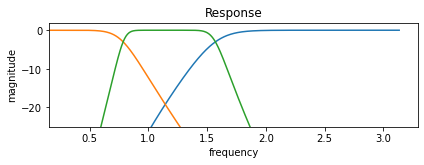

In [2]:
#Part 1 
high_co = np.pi/2 #these are the values given to us
low_co = np.pi/4

w_high_co = high_co / np.pi #change to w
w_low_co = low_co / np.pi
w_bypass = [w_high_co, w_low_co]

#writing butterworth circuit with order = 5
b_low, a_low = sig.butter(5, w_low_co) 
b_high, a_high = sig.butter(5, w_high_co, btype = 'highpass')
b_bandpass, a_bandpass = sig.butter(5, w_bypass, btype = 'bandpass')

#compute frequency
w_low, h_low = sig.freqz(b_low, a_low)
w_high, h_high = sig.freqz(b_high, a_high)
w_bandpass, h_bandpass = sig.freqz(b_bandpass, a_bandpass)

#converting into dB
h_low_dB = 20*np.log10(np.abs(h_low))
h_high_dB = 20*np.log10(np.abs(h_high))
h_bandpass_dB = 20*np.log10(np.abs(h_bandpass))

#plotting graph
plt.figure()
plt.subplot(212)
plt.plot(w_high, h_high_dB)
plt.plot(w_low, h_low_dB)
plt.plot(w_bandpass, h_bandpass_dB)
plt.title('Response')
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.ylim(-25,2)
plt.xlim(0.05*np.pi)
plt.tight_layout()

#Part 2
def op_equalize(signal,g1,g2,g3):
    g1=10**(g1/20) #converting from log
    g2=10**(g2/20)
    g3=10**(g3/20)

    fs_s, x_s = wav.read(signal)

    if(g1==0):
        low_output = sig.lfilter(b_low, a_low, x_s)
    else:
        low_output = g1*sig.lfilter(b_low, a_low, x_s)

    if(g2==0):
        high_output = sig.lfilter(b_high, a_high, x_s)
    else:
        high_output = g2*sig.lfilter(b_high, a_high, x_s)

    if(g3==0):
        bandpass_output = sig.lfilter(b_bandpass, a_bandpass, x_s)
    else:
        bandpass_output = sig.lfilter(b_bandpass, a_bandpass, x_s)

#x2 to amplify
    output = (low_output + high_output + bandpass_output) * 2 
    return output

#Part 3
fs_file, x_file = wav.read('music.wav')
output = op_equalize('music.wav',0,0,0)
outfile = 'testing.wav'
wav.write = (outfile, fs_file, output.astype('int16'))

#Part 4
output_2 = op_equalize('music.wav',5,5,0)
outfile = 'music_ex1.wav'
wav.write = (outfile, fs_file, output_2.astype('int16'))
wav_obj = sa.WaveObject.from_wave_file('music_ex1.wav')
play_obj = wav_obj.play() 
play_obj.wait_done()

output_3 = op_equalize('music.wav',0,0,-70)
outfile = 'music_ex2.wav'
wav.write = (outfile, fs_file, output_3.astype('int16'))
wav_obj = sa.WaveObject.from_wave_file('music_ex2.wav')
play_obj = wav_obj.play() 
play_obj.wait_done()

# Discussion 4 

 While from experimenting no such constrains on the gains were spotted, since it worked at most experimented values, the filter does not work for critical frequency > 2